# Project Business Statistics: E-news Express


# Define Problem Statement and Objectives

## Problem statement

The online news platform E-news Express wants to grow its business by attracting more subscribers. To achieve this, the company plans to analyze data from users who visit the landing page to better understand user preferences and behavior. The company’s executives believe that the decline in monthly subscribers from the previous year is due to the website's design, which lacks an engaging layout and relevant content recommendations. Improving these features would potentially encourage users to stay longer and ultimately subscribe.

## Objective

The company’s design team has developed a new landing page with a more refined layout and more relevant content compared to the old version. To evaluate the effectiveness of the new landing page in attracting new subscribers, the Data Science team conducted an experiment. They randomly selected 100 users and split them into two equal groups: The first group (control group) saw the existing landing page, while the second group (treatment group) was shown the new version. The Data Science team measured the time spent on the landing page and whether the user ended up subscribing (converting). As a data scientist at E-news Express, we need to analyze the data and perform statistical analyses at a 5% significance level to assess whether the new landing page is more effective in attracting new subscribers.

The company wants answers to the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?

##### Data Dictionary Reference
| Column | Definition |
| ------ | ---------- |
| user_id | Unique user ID of the person visitng the website |
| group | Whether the user belongs to the first group (control) or the second group (treatment) |
| landing_page | Whether the landing page is new or old |
| time_spent_on_the_page | Time (in minutes) spent by the user on the landing page |
| converted | Whether the user gets converted to a subscriber of the news portal or not |
| language_preferred | Language chosen by the user to view the landing page |


## Import all the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import f
from scipy.stats import levene
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Display float numbers with three digits to the right of the decimal point.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/E-news_Express_DSBA_Project/abtest.csv')

### Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# First five rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
3,546567,control,old,3.020,no,French
4,546459,treatment,new,4.750,yes,Spanish


In [5]:
# Last five rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.150,no,Spanish
96,546544,control,old,6.520,yes,English
97,546472,treatment,new,7.070,yes,Spanish
98,546481,treatment,new,6.200,yes,Spanish
99,546483,treatment,new,5.860,yes,English


In [6]:
# Data frame shape
print("There are ", df.shape[0], " rows and ", df.shape[1], " columns in the dataset.", sep = "")

There are 100 rows and 6 columns in the dataset.


In [7]:
# Data frame information
df.info()

# Data types and missing values (no missing values). Four categorical variables and two numerical (one integer one float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
# Statistical summary
df.describe().T

# Time spent on page ranges from 0.190 minutes (11.4 seconds) to 10.710 minutes (642.6 seconds)
# The mean time spent on page is 5.3778 minutes (322.67 seconds)

,count,mean,std,min,25%,50%,75%,max
user_id,100.000,546517.000,52.296,546443.000,546467.750,546492.500,546567.250,546592.000
time_spent_on_the_page,100.000,5.378,2.378,0.190,3.880,5.415,7.022,10.710


In [9]:
# Check for null values
print("There are", df.isnull().sum().sum(), "null values.") # No null values

There are 0 null values.


In [10]:
# Check for duplicated rows
print("There are", df.duplicated().sum(), "duplicated rows.") # No duplicate rows

There are 0 duplicated rows.


In [11]:
# Extra data check: Checking that group assignment is correct
# Control group should have only seen the old page
# Treatment group should have only seen the new page

count = 0;
for i in range(df.shape[0]): # For all rows
  if df.iloc[i,1] == 'control' and df.iloc[i,2] == 'new_page': # if a user was in the control group and saw the new page...
    print("Warning: Control group saw new page!")
    count += 1; # Mark it
  elif df.iloc[i,1] == 'treatment' and df.iloc[i,2] == 'old_page': # if a user was in the treatment group and saw the old page...
    print("Warning: Treatment group saw old page!")
    count += 1; # Mark it

if count == 0: # If there were no marks
  print("No warnings! Group and landing page relationship is correct.")

No warnings! Group and landing page relationship is correct.


## Univariate Analysis

In [51]:
# Print number of unique entries for each variable.

for i in range(df.shape[1]):
  print("There are ", df.iloc[:,i].nunique(), " unique entries in ", df.columns[i], ".",sep='')


There are 100 unique entries in user_id.
There are 2 unique entries in group.
There are 2 unique entries in landing_page.
There are 94 unique entries in time_spent_on_the_page.
There are 2 unique entries in converted.
There are 3 unique entries in language_preferred.


In [53]:
# Print number of users in both groups

print(df.iloc[:,1].value_counts())

group
control      50
treatment    50
Name: count, dtype: int64


--------------------------------------------------
                      group                       
--------------------------------------------------
Unique group values: 2
Category control has 50 entries.
Category treatment has 50 entries.


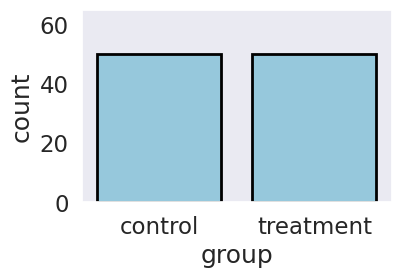

--------------------------------------------------
                   landing_page                   
--------------------------------------------------
Unique landing_page values: 2
Category old has 50 entries.
Category new has 50 entries.


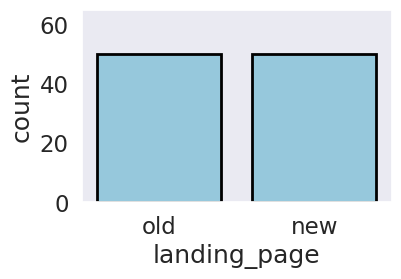

--------------------------------------------------
                    converted                     
--------------------------------------------------
Unique converted values: 2
Category yes has 54 entries.
Category no has 46 entries.


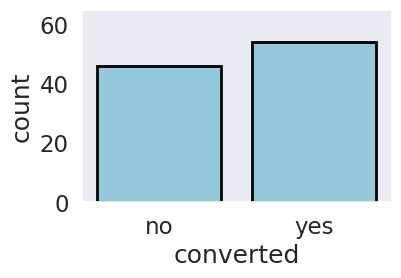

--------------------------------------------------
                language_preferred                
--------------------------------------------------
Unique language_preferred values: 3
Category Spanish has 34 entries.
Category French has 34 entries.
Category English has 32 entries.


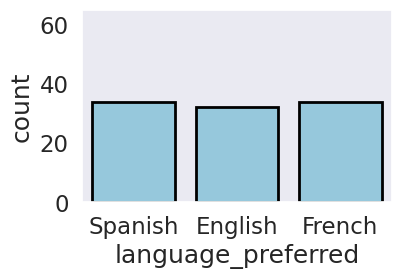

In [75]:
# Make countplots for all categorical variables

# Make data frame for only categorical variables
cat_cols = df.drop(columns=['user_id','time_spent_on_the_page']).copy()
cols = cat_cols.columns.tolist()

for numb, i in enumerate(cols):
  print("-" * 50)
  print(i.center(50))
  print("-" * 50)

  # Indicate category name and number of categories
  num_cats = cat_cols[i].nunique() # number of unique categorical values
  col_name = cat_cols[i].name
  print("Unique", col_name, "values:", num_cats)

  # Print out the categories and the number of entries.
  for j in np.arange(0,num_cats):
      name_lev = cat_cols.iloc[:,numb].value_counts().index[j]
      num_entries = cat_cols.iloc[:,numb].value_counts().iloc[j]
      print("Category",name_lev, "has", num_entries, "entries.")

  # make countplot
  plt.figure(figsize=(4,2.5))
  plt.ylim(0,65)
  sns.countplot(data=cat_cols,x=cat_cols[i], color = 'skyblue', saturation = 0.7,
                edgecolor = 'black',linewidth = 2
                );

  # display the plot
  plt.show()

--------------------------------------------------
              time_spent_on_the_page              
--------------------------------------------------


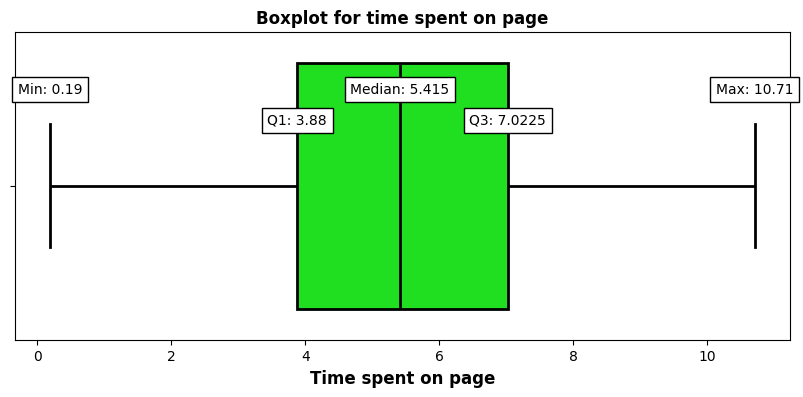

In [15]:
# Make boxplot for time_spent_on_the_page

df_cont = df['time_spent_on_the_page']
name_col = 'time_spent_on_the_page'

print("-" * 50)
print(name_col.center(50))
print("-" * 50)

# Create boxplot for time spent on the page
plt.figure(figsize=(10, 4))
box_plot = sns.boxplot(x=df_cont, color=[0,1,0], linewidth = 2, linecolor='black',
                       legend=False
                       );

plt.xlabel('Time spent on page', fontsize=12, fontweight='bold')
plt.title('Boxplot for time spent on page', fontsize=12, fontweight='bold')

# Calculate quartiles and median
Min = df_cont.quantile(0)
Q1 = df_cont.quantile(0.25)
Q3 = df_cont.quantile(0.75)
Max = df_cont.quantile(1)
median = df_cont.median()

# Set the labels, title, position, fontsize and alignment for the output.
plt.text(x=Min, y=-0.3, s=f'Min: {Min}', color='black', ha='center',
         bbox=dict(facecolor='white', alpha=1,edgecolor = 'black')
         ) # Min = 0.19

plt.text(x=Q1, y=-0.2, s=f'Q1: {Q1}', color='black', ha='center',
         bbox=dict(facecolor='white', alpha=1,edgecolor = 'black')
         ) # Q1 = 3.88

plt.text(x=Q3, y=-0.2, s=f'Q3: {Q3}', color='black', ha='center',
         bbox=dict(facecolor='white', alpha=1,edgecolor = 'black')
         ) # Median = 5.415

plt.text(x=median, y=-0.3, s=f'Median: {median}', color='black', ha='center',
         bbox=dict(facecolor='white', alpha=1,edgecolor = 'black')
         ) # Q3 = 7.0225

plt.text(x=Max, y=-0.3, s=f'Max: {Max}', color='black', ha='center',
         bbox=dict(facecolor='white', alpha=1,edgecolor = 'black')
         ) # Max = 10.71

plt.show()

## Bivariate Analysis

### Time spent on page by group

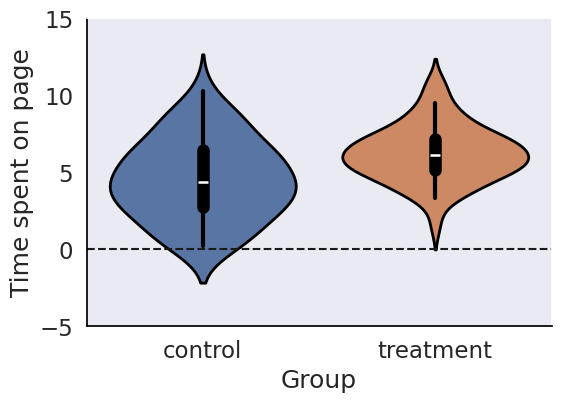

In [16]:
# Time spent on page by group

plt.figure(figsize=(6,4))
sns.set(font_scale=1.5)
sns.set_style('dark')
TSP_by_Group = sns.violinplot(data=df, x = df.loc[:,df.columns[1]], y =
                              df.loc[:,df.columns[3]], hue =
                              df.loc[:,df.columns[1]], edgecolor = 'black',
                              linewidth = 2
                              );

# Customizations
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
TSP_by_Group.set(xlabel='Group', ylabel='Time spent on page')
plt.axhline(y=0, color='k', linestyle='--')
TSP_by_Group.set_ylim(-5, 15);

# display the plot
plt.show()

# The treatment group spent more time on the new page than the control group spent on the existing page.

### Time spent on page by conversion

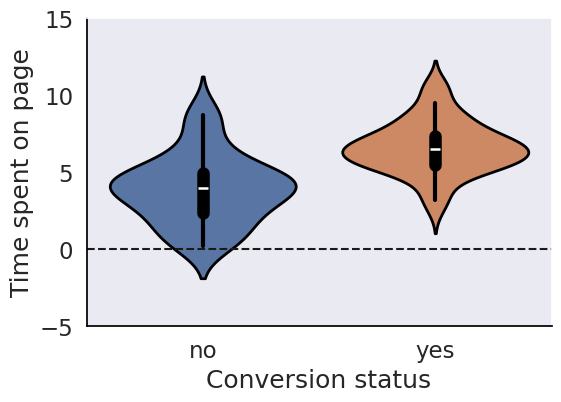

In [73]:
# Time spent on page by conversion

plt.figure(figsize=(6,4))
sns.set(font_scale=1.5)
sns.set_style('dark')
TSP_by_Group = sns.violinplot(data=df, x = df.loc[:,df.columns[4]], y =
                              df.loc[:,df.columns[3]],hue =
                              df.loc[:,df.columns[4]], edgecolor = 'black',
                              linewidth = 2
                              );

# Customizations
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
TSP_by_Group.set(xlabel='Conversion status', ylabel='Time spent on page')
plt.axhline(y=0, color='k', linestyle='--')
TSP_by_Group.set_ylim(-5, 15);

# display the plot
plt.show()

# Users that converted spent more time on the langing page, irrespective of group.

### Time spent on page by preferred language

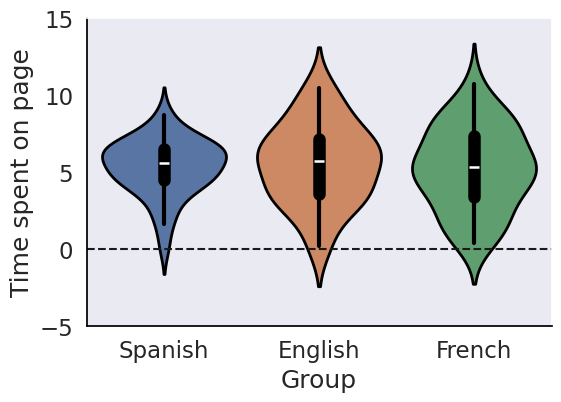

In [72]:
# Time spent on new page by language preferred

plt.figure(figsize=(6,4))
sns.set(font_scale=1.5)
sns.set_style('dark')
TSP_by_Group = sns.violinplot(data=df, x = df.loc[:,df.columns[5]], y =
                              df.loc[:,df.columns[3]], hue =
                              df.loc[:,df.columns[5]], edgecolor = 'black',
                              linewidth = 2
                              );

# Customizations
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
TSP_by_Group.set(xlabel='Group', ylabel='Time spent on page')
plt.axhline(y=0, color='k', linestyle='--')
TSP_by_Group.set_ylim(-5, 15);

# display the plot
plt.show()

# Time spent on page is roughly similar for users with different language preferences.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

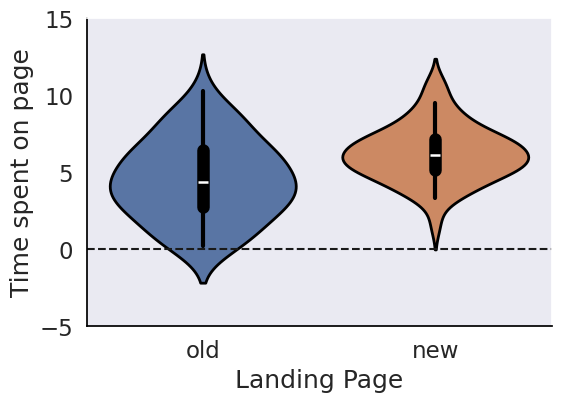

In [71]:
# Time spent on page by landing page

plt.figure(figsize=(6,4))
sns.set(font_scale=1.5)
sns.set_style('dark')
TSP_by_Group = sns.violinplot(data=df, x = df.loc[:,df.columns[2]], y =
                              df.loc[:,df.columns[3]], hue =
                              df.loc[:,df.columns[2]], edgecolor = 'black',
                              linewidth = 2
                              );

# Customizations
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
TSP_by_Group.set(xlabel='Landing Page', ylabel='Time spent on page')
plt.axhline(y=0, color='k', linestyle='--')
TSP_by_Group.set_ylim(-5, 15);

# display the plot
plt.show()

# Treatment group spent more time on the new page than the control group spent on the old page.

### Step 1: Define the null and alternate hypotheses

Let $\mu_n$ be the mean time spent on the new landing page.

Let $\mu_o$ be the mean time spent on the old landing page.

We are testing the null hypothesis

>$H_0:$  $\mu_n$ ≤ $\mu_o$

against the alternative hypothesis

> $H_a:$ $\mu_n$ > $\mu_o$

### Step 2: Select Appropriate test

We are contrasting continuous data from two independent samples collected via simple random sample. The test is directional, as we are testing whether one mean is greater than the other. Thus, this requires a two sample T-test for equality of means test.

Check Assumptions:

This test assumes that the data are normally distributed and depends on whether the standard deviations are equal. To check these assumptions we will use Shapiro-Wilks and Levene's tests.


### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on page DOES NOT follow a normal distribution

In [20]:
# Assumption 1: Normality

# find the p-value using a Shapiro-Wilks test
w_shapiro_q1, p_value_shapiro_q1 = stats.shapiro(df['time_spent_on_the_page'])
print('Because the p-value is ', round(p_value_shapiro_q1,3),"...", sep = '')

if p_value_shapiro_q1 < 0.05:
  print("We reject the null hypothesis that time spent on page follws a normal distribution.")
else:
  print('We fail to reject the null hypothesis that time spent on page follows a normal distribution.')

Because the p-value is 0.564...
We fail to reject the null hypothesis that time spent on page follows a normal distribution.


### Levene’s test

We will test the null hypothesis

>$H_0$: The population variances are equal between the old and new landing pages

against the alternative hypothesis

>$H_a$: The population variances are NOT equal between the old and new landing pages

In [21]:
# Assumption 2: Homogeneity of Variance

# find the p-value using Levene's test
statistic_levenes_q1, p_value_levenes_q1 = levene( df['time_spent_on_the_page'][df['landing_page']=="old"],
                                                   df['time_spent_on_the_page'][df['landing_page']=="new"]
                                                   );

print('Because the p-value is ', round(p_value_levenes_q1,3),"...", sep = '')

if p_value_levenes_q1 < 0.05:
  print("We reject the null hypothesis that the population variances are equal between old and new landing pages.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between old and new landing pages.')

Because the p-value is 0.009...
We reject the null hypothesis that the population variances are equal between old and new landing pages.


### Step 3: Decide the significance level

#### Set alpha to 0.05

In [22]:
# The problem statement indicates an alpha of 0.05
α_q1 = 0.05

### Step 4: Collect and prepare data

In [23]:
# Divide time spent on page data by group

new_page_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_page_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# Sample means and  standard deviations for the two sets of data
print('The mean time spent on the new page is ' + str(round(new_page_time.mean(),2)),'.', sep = "")
print('The mean time spent on the old page is ' + str(round(old_page_time.mean(),2)),'.', sep = "")
print('The standard deviation of time spent on the new page is ' + str(round(new_page_time.std(),2)),'.', sep = "")
print('The standard deviation of time spent on the old page is ' + str(round(old_page_time.std(),2)),'.', sep = "")

The mean time spent on the new page is 6.22.
The mean time spent on the old page is 4.53.
The standard deviation of time spent on the new page is 1.82.
The standard deviation of time spent on the old page is 2.58.


### Step 5: Calculate the p-value

In [24]:
# Testing the hypothesis that the time spent on the new page will be greater than the time spent on the old page.
t_stat_q1, p_value_q1 = stats.ttest_ind(new_page_time, old_page_time, equal_var = False, alternative='greater')

print("The t-statistic is ", round(t_stat_q1,3), " and the p-value is ", round(p_value_q1,4),'.', sep = "")

The t-statistic is 3.787 and the p-value is 0.0001.


In [66]:
# create function to plot t-test statistic distribution
def plot_ttest_dist(stat):
  plt.figure(figsize=(6,4))
  sns.set_style('dark')
  x = np.linspace(-6, 6, 100) # create an array of 100 numbers starting from -6 and ending at 6
  plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
  plt.axvline(x = stat, c = 'r', linestyle='--') # draw a vertical red line through the test statistic
  plt.axvline(x = 1.96, c = 'g') # draw a vertical green line through the critical value.
  x1 = np.linspace(1.96, 6, 50) # create an array of 50 numbers starting from the critical value and ending at 6

  # Customizations
  plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
  plt.annotate('Reject Null', (4, 0.10),fontsize = 10) # annotate reject region
  plt.annotate('  Do Not Reject\n        Null', (-1.55, 0.10),fontsize = 10) # annotate do not reject region
  plt.title('Test Statistic Distribution')
  plt.xlabel('Test Statistic')
  plt.ylabel('Probability Density')
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_color('black')
  plt.gca().spines['bottom'].set_color('black')

  # display the plot
  plt.show()

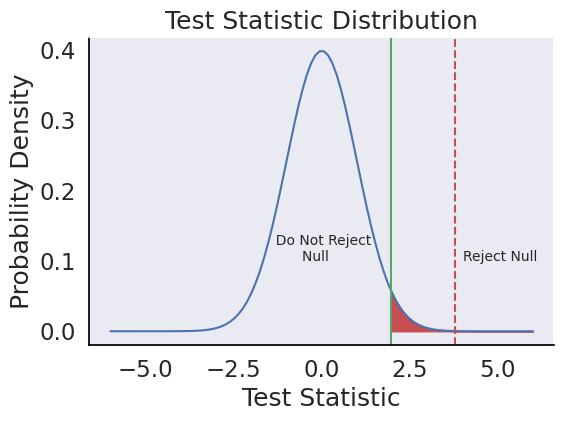

In [67]:
# plotting the test statistic distribution and indicating the rejection and acceptance region

plot_ttest_dist(t_stat_q1)

### Step 6: Compare the p-value with $\alpha$

In [27]:
if p_value_q1 < α_q1:
  print("Reject the null hypothesis. The time spent on the new page is significantly greater than the time spent on the old page.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference between the time spent on the new and old pages.")

Reject the null hypothesis. The time spent on the new page is significantly greater than the time spent on the old page.


### Step 7:  Draw inference

*   As the p-value (0.0001) is much less than the level of significance, we can reject the null hypothesis. Hence, we have enough evidence to conclude that  time spent on the new page is greater than the time spent on the existing page.  

*   Users spent significantly more time on the new landing page (6.22 minutes for the new page vs. 4.53 minutes for the existing page), which suggests that users are also more likely to subscribe to E-news Express with the new landing page over the old one.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform visual analysis

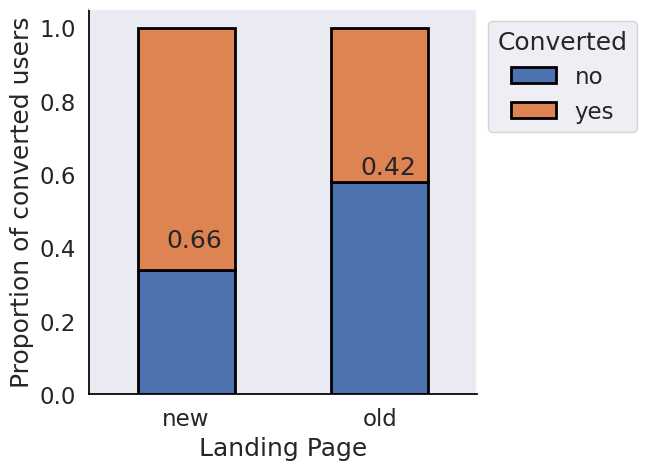

In [62]:
# Comparing the proportion of converted users between landing pages.

# Calculate proportion converted for both groups
new_converts = df[df['landing_page'] == 'new']['converted'].groupby(df['converted']).count()
prop_new = new_converts.iloc[1]/new_converts.sum()
old_converts = df[df['landing_page'] == 'old']['converted'].groupby(df['converted']).count()
prop_old = old_converts.iloc[1]/old_converts.sum()

# Plot stacked bar graph showing proportions
sns.set_style('dark')
prop_fig = pd.crosstab(df.loc[:,df.columns[2]],df.loc[:,df.columns[4]],normalize='index').plot(kind="bar",figsize = (5,5),stacked=True, edgecolor = 'black', linewidth = 2);
prop_fig.legend(title="Converted")
plt.text(x=-0.1, y=0.4, s=prop_new)
plt.text(x=0.9, y=0.6, s=prop_old)

# Customizations
sns.move_legend(prop_fig, "upper left", bbox_to_anchor=(1, 1));
prop_fig.set_xlabel('Landing Page');
prop_fig.set_ylabel('Proportion of converted users');
plt.xticks(rotation=0)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.show();

# The plot suggests that the conversion rate is greater for the new landing page over the old one.

### Step 1: Define the null and alternate hypotheses

#### Define the null and alternative hypothesis
Let $p_n$ and $p_o$ be the proportions of users who converted after using the new and old landing pages, respectively.

We will test the null hypothesis

>$H_0:p_n ≤ p_o$

against the alternative hypothesis

>$H_a:p_n > p_o$

### Step 2: Choose the appropriate test

We are contrasting two proportions. The test is directional, as we are testing whether one proportion is greater than the other. Thus, this requires a two proportion Z-test.

Checking assumptions for two proportion Z-test

*   Binomally distributed population - Yes, a user either converted or they did not.
*   Random sampling from the population - Yes,the description in the objectives section states that the collected sample is a simple random sample.  
*   Can the binomial distribution be approximated to normal distribution - Yes (see Step 4 below)

>$np_n = 50\cdot \frac{17}{50} =17 \geq 10$
>
>$n(1-p_n) = 50 \cdot \frac{50-17}{50} =33 \geq 10$
>
>$np_o = 50\cdot \frac{29}{50} =29 \geq 10$
>
>$n(1-p_o) = 50 \cdot \frac{50-29}{50} =21 \geq 10$

### Step 3: Set alpha to 0.05

In [29]:
# The problem statement indicates an alpha of 0.05
α_q2 = 0.05

### Step 4: Collect and prepare data

In [30]:
# Calculating proportion of converted users for each group

new_page_conv = df[df['group'] == 'treatment']['converted'].groupby(df['converted']).count(); print("Number of converted users from new page:", new_page_conv)
print("-" * 50)
old_page_conv = df[df['group'] == 'control']['converted'].groupby(df['converted']).count(); print("Number of converted users from old page:", old_page_conv)
new_page_conv_rate = new_page_conv.iloc[1]/new_page_conv.sum()
old_page_conv_rate = old_page_conv.iloc[1]/old_page_conv.sum()
print("-" * 50)

print("The proportion of converted users for the new and existing pages are ", round(new_page_conv_rate,3), " and ", round(old_page_conv_rate,3), ", respectively.", sep="")

Number of converted users from new page: converted
no     17
yes    33
Name: converted, dtype: int64
--------------------------------------------------
Number of converted users from old page: converted
no     29
yes    21
Name: converted, dtype: int64
--------------------------------------------------
The proportion of converted users for the new and existing pages are 0.66 and 0.42, respectively.


### Step 5: Calculate the p-value

In [31]:
# set the counts of converted users (grab values from results of previous coding block)
converts = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value using a two proportions z-test
test_stat_q2, p_value_q2 = proportions_ztest(converts, nobs, alternative = 'larger' )
print("The test statistic is ", round(test_stat_q2,3), " and the p-value is ", round(p_value_q2,4),".",sep="")

The test statistic is 2.408 and the p-value is 0.008.


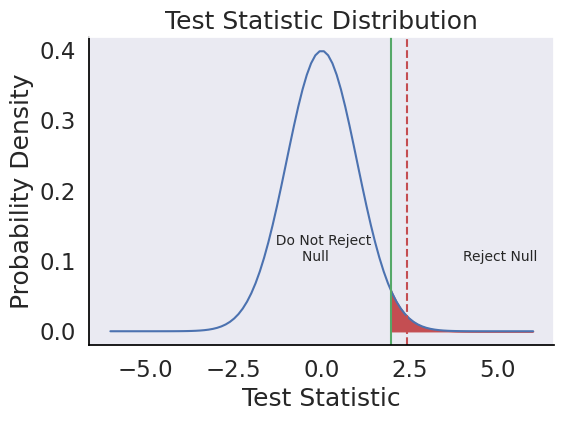

In [68]:
# plotting the test statistic distribution and indicating the rejection and acceptance region
plot_ttest_dist(test_stat_q2)

### Step 6: Compare the p-value with $\alpha$

In [33]:
# Compare p-value to alpha

if p_value_q2 < α_q2:
  print("Reject the null hypothesis. The proportion of converted users is greater for users who saw the new page.")
else:
  print("Fail to reject the null hypothesis. The proportion of converted users is NOT greater for users who saw the new page.")

Reject the null hypothesis. The proportion of converted users is greater for users who saw the new page.


### Step 7: Draw Inference

*  As the p-value is less than the significance level 0.05, we reject the null hypothesis. Thus, we have strong enough evidence to conclude that the proportion of converted users who experienced the new landing page is greater than the proportion of users who experienced the existing landing page.

*  This suggests that the new landing page will increase the number of subscribers to e-News Express.

## 3. Is the conversion and preferred language are independent or related?

### Visualize data

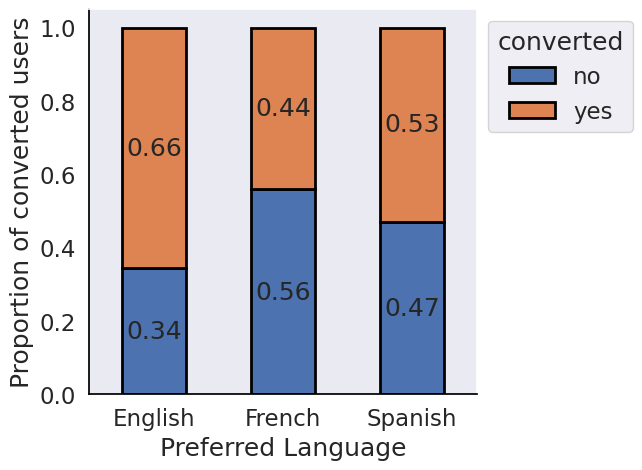

In [61]:
# Conversions by group and language preferred
sns.set_style('dark')
Conversion_by_language = pd.crosstab(df.loc[:,df.columns[5]],df.loc[:,df.columns[4]],
                                     normalize='index').plot(kind="bar", figsize=(5,5),
                                                             stacked=True, edgecolor = 'black',
                                                             linewidth = 2
                                                             );

# Customizations

# Annotate graph
for c in Conversion_by_language.containers:
    # set the bar label
    Conversion_by_language.bar_label(c, label_type='center',fmt='%.2f')

sns.move_legend(prop_fig, "upper left", bbox_to_anchor=(1, 1));
plt.xticks(rotation=0)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.xticks(rotation=0)
sns.move_legend(Conversion_by_language, "upper left", bbox_to_anchor=(1, 1));
Conversion_by_language.set_xlabel('Preferred Language');
Conversion_by_language.set_ylabel('Proportion of converted users');
plt.show();

# The figure suggests that users who prefer the French language are less likely to convert than users who prefer English or Spanish.

### Step 1: Define the null and alternative hypothesis

#### Define the null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ Conversion status is independent of preferred language

against the alternative hypothesis

>$H_a:$ Conversion status is NOT independent of preferred language

### Step 2: Choose the appropriate test


We are determining dependency between two categorical variables. This requires a chi-square test for independence.

Check Assumptions:

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5 (see Step 4 below).
* Random sampling from the population - Yes, the objectives section above states that the collected sample is a simple random sample.


### Step 3: Set alpha to 0.05

In [35]:
# The problem statement indicates an alpha of 0.05
α_q3 = 0.05

### Step 4: Collect and prepare data

In [56]:
# Calculating the proportion of converted users for users with different language preferences.

English_conv = df[df['language_preferred'] == 'English']['converted'].groupby(df['converted']).count()
English_conv_rate = English_conv.iloc[1]/English_conv.sum()

Spanish_conv = df[df['language_preferred'] == 'Spanish']['converted'].groupby(df['converted']).count()
Spanish_conv_rate = Spanish_conv.iloc[1]/Spanish_conv.sum()

French_conv = df[df['language_preferred'] == 'French']['converted'].groupby(df['converted']).count()
French_conv_rate = French_conv.iloc[1]/French_conv.sum()

print("-" * 50)
print("The proportion of converted users for users with\npreferred languages of English, Spanish, and French\nare ",
      round(English_conv_rate,3), ", ", round(Spanish_conv_rate,3), ', and ',round(French_conv_rate,3),
      ", respectively.",sep=""
      )
print("-" * 50)

# Setup contingency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
print(contingency_table)
print("-" * 50)


--------------------------------------------------
The proportion of converted users for users with
preferred languages of English, Spanish, and French
are 0.656, 0.529, and 0.441, respectively.
--------------------------------------------------
converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18
--------------------------------------------------


### Step 5: Calculate the p-value

In [57]:
from scipy.stats import chi2_contingency

# Calculate the p-value using the Chi-squared test of independence.
chi2_stat_q3, p_val_chi2_q3, dof_chi2_q3, exp_freq_chi2_q3 = chi2_contingency(contingency_table)
print("The chi-squared statistic is ", round(chi2_stat_q3,3), " and the p-value is ", round(p_val_chi2_q3,4),".",sep="")

The chi-squared statistic is 3.093 and the p-value is 0.213.


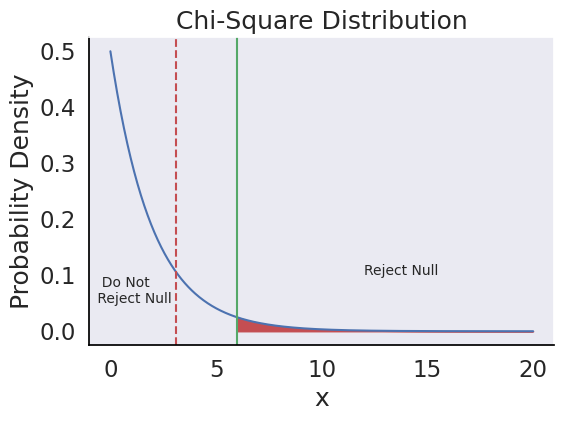

In [60]:
# Define the degrees of freedom
dfree = 2

# Generate x values
x = np.linspace(0, 20, 500)

# Calculate the chi-square probability density function (PDF)
pdf = stats.chi2.pdf(x, dfree)

# Plot chi square distribution with critical value and test statistic
plt.figure(figsize=(6, 4))
sns.set_style('dark')
plt.plot(x, pdf, label=f'Chi-Square Distribution (df={dfree})')
plt.title('Chi-Square Distribution')
stat = chi2_stat_q3 # set the critical value
plt.axvline(x = stat, c = 'r',linestyle = '--') # draw a vertical red line through the mentioned point
plt.axvline(x = 5.991, c = 'g') # draw a vertical green line through the mentioned point
x1 = np.linspace(5.991, 20, 50) # create an array of 50 numbers starting from the critical value and ending at 6
plt.fill_between(x1, stats.chi2.pdf(x1, dfree), color='r') # fill the area under the curve after the critical value with red color

# Customizations
plt.annotate('Reject Null', (12, 0.10),fontsize = 10) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not\n Reject Null', (-0.8, 0.05),fontsize = 10) # annotate the mentioned text at the mentioned location
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')

# display the plot
plt.show()

### Step 6: Compare the p-value with  𝛼

In [39]:
if p_val_chi2_q3 < α_q3:
  print("Reject the null hypothesis. Language preferred and conversion status are not independent.")
else:
  print("Fail to reject the null hypothesis. Language preferred and conversion status are independent.")

Fail to reject the null hypothesis. Language preferred and conversion status are independent.


### Step 7: Draw inference

As the p-value is greater than the significance level 0.05, we cannot reject the null hypothesis. Hence, we do NOT have enough statistical significance to conclude that conversion status is independent of language preference.

## 4. Is the time spent on the new page same for the different language users?

### Perform visual analysis

In [40]:
# Get the levels and number of entries for language preferred.
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


In [41]:
# Create new dataframe for users who saw the new page and calculate means of each language preferred
df_new_page = df[df['group'] == 'treatment'];
Mns = df_new_page.groupby(['language_preferred'],observed=True)['time_spent_on_the_page'].mean();
Mns_sorted = Mns.reindex(index=['English', 'Spanish', 'French'])
Mns_sorted

,time_spent_on_the_page
language_preferred,
English,6.664
Spanish,5.835
French,6.196


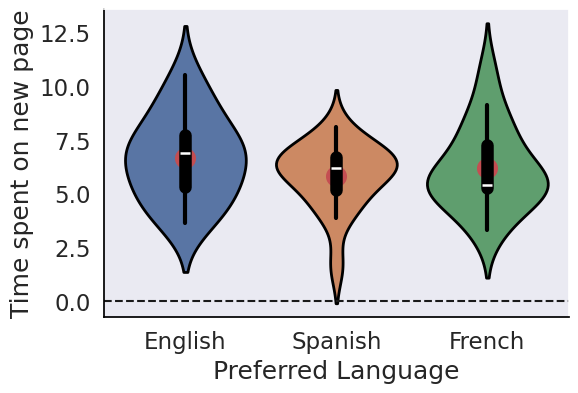

In [59]:
# Time on new page by preferred language

sns.set(font_scale=1.5)
plt.figure(figsize=(6,4));
sns.set_style('dark')
TSP_by_language = sns.violinplot(data=df_new_page, x = df_new_page['language_preferred'],
                                 y = df_new_page['time_spent_on_the_page'],
                                 hue = df_new_page['language_preferred'],
                                 edgecolor = "black", linewidth = 2
                                 );

# Customizations
plt.scatter(x=range(len(Mns_sorted)),y=Mns_sorted,s = 200, c="r") # Represent the means as red dots
TSP_by_language.set_xlabel('Preferred Language');
TSP_by_language.set_ylabel('Time spent on new page');
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
TSP_by_Group.set(xlabel='Group', ylabel='Time spent on page')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

# The graph suggests that there is no difference in time spent on the new page between users with different language preferences.

### Step 1: Define the null and alternative hypothesis

Let $\mu_e$ be the mean time spent on new page for users who prefer English.

Let $\mu_s$ be the mean time spent on new page for users who prefer Spanish.

Let $\mu_f$ be the mean time spent on new page for users who prefer French.

We are testing the null hypothesis

>$H_0:$  $\mu_e$ = $\mu_s$ = $\mu_f$

against the alternative hypothesis

> $H_a:$ Time spent on page is different for users of one or more languages.

#### Shapiro-Wilk's Test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page DOES NOT follow a normal distribution

### Step 2: Choose the appropriate test

We have one categorical and one continuous variable. There are more than two samples, which cannot be contrasted using Z- or T-tests. Determining whether there are differences in the mean between the three language groups requires a one-way ANOVA F-test.

#### Checking assumptions for one-way ANOVA F-test
* The populations are normally distributed - Yes, the normality assumption was verified using the Shapiro-Wilk’s test (see below).
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption was verified using the Levene's test (see below).

In [43]:
#### Assumption 1: Normality

#### find the p-value of the Shapiro-Wilks test
w_shapiro_q4, p_value_shapiro_q4 = stats.shapiro(df_new_page['time_spent_on_the_page'])
print('Because the p-value is ', round(p_value_shapiro_q4,4),"...", sep = '')

if p_value_shapiro_q4 < 0.05:
  print("We reject the null hypothesis that time spent on the new page data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that time spent on new page data are normally distributed.')

Because the p-value is 0.804...
We fail the reject the null hypothesis that time spent on new page data are normally distributed.


#### Levene's Test

We will test the null hypothesis

>$H_0$: All the population variances for users with different language preferences are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [44]:
#### Assumption 2: Homogeneity of Variance

#### find the p-value of the Levene's test
statistic_levenes_q4, p_value_levenes_q4 = levene( df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="English"],
                                                   df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="Spanish"],
                                                   df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="French"])

#### find the p-value of Levene's test
print('Because he p-value is ', round(p_value_levenes_q4,4),"...", sep = '')

if p_value_levenes_q4 < 0.05:
  print("We reject the null hypothesis that the population variances are equal between users with different language preferences.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between users with different language preferences.')

Because he p-value is 0.4671...
We fail to reject the null hypothesis that the population variances are equal between users with different language preferences.


### Step 3: Set alpha to 0.05

In [45]:
# The problem statement indicates an alpha of 0.05
α_q4 = 0.05

### Step 4: Collect and prepare data

In [46]:
# Time spent on new page data for users of each preferred language.

English_TSP = df_new_page[df_new_page['language_preferred'] == 'English']['time_spent_on_the_page']
Spanish_TSP = df_new_page[df_new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page']
French_TSP = df_new_page[df_new_page['language_preferred'] == 'French']['time_spent_on_the_page']

# Mean time spent on new page for users of each preferred language.

English_TSP_mean = English_TSP.mean()
Spanish_TSP_mean = Spanish_TSP.mean()
French_TSP_mean = French_TSP.mean()

print("The mean time spent on the new page for users with \npreferred languages of English, Spanish, and \nFrench are ", round(English_TSP_mean,3), ", ", round(Spanish_TSP_mean,3), ', and ',round(French_TSP_mean,3), ", respectively.",sep='')

The mean time spent on the new page for users with 
preferred languages of English, Spanish, and 
French are 6.664, 5.835, and 6.196, respectively.


### Step 5: Calculate the p-value

In [47]:
from scipy.stats import f_oneway

# calculate the p-value using the one-way ANOVA test
anova_f_q4, anova_p_q4 = f_oneway(English_TSP, Spanish_TSP, French_TSP)
print("The F-statistic is ", round(anova_f_q4,3), " and the p-value is ", round(anova_p_q4,4),".",sep="")

The F-statistic is 0.854 and the p-value is 0.432.


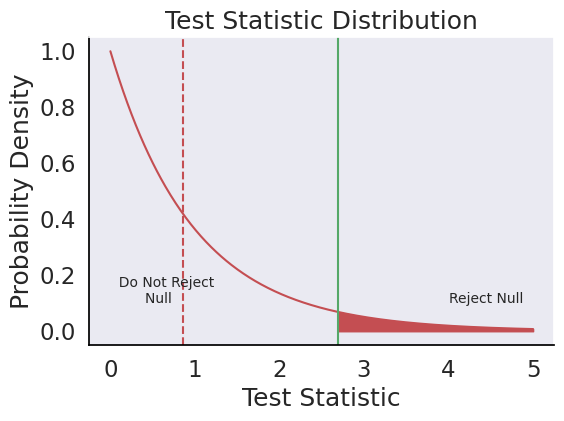

In [48]:
# Plot the F-distribution to better visualize the calculations

# Define degrees of freedom
dfn = df['language_preferred'].nunique() - 1  # numerator degrees of freedom
dfd = df.shape[0]-df['language_preferred'].nunique() # denominator degrees of freedom

# Generate x values
x = np.linspace(0, 5, 500)

# Calculate F-distribution values
y = f.pdf(x, dfn, dfd)

# Plot distribution
plt.figure(figsize=(6,4))
plt.plot(x, y, 'r-', label=f'F({dfn}, {dfd})');
plt.title('F-Distribution')
stat = anova_f_q4 # set the critical value
plt.axvline(x = stat, c = 'r', linestyle='--') # draw a vertical red line through the mentioned point
plt.axvline(x = 2.69, c = 'g') # draw a vertical green line through the mentioned point
x1 = np.linspace(2.69, 5, 50) # create an array of 50 numbers starting from the critical value and ending at 6
plt.fill_between(x1, f.pdf(x1, dfn, dfd), color='r') # fill the area under the curve after the critical value with red color

# Customizations
plt.annotate('Reject Null', (4, 0.10),fontsize = 10) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (0, 0.10),fontsize = 10) # annotate the mentioned text at the mentioned location
plt.title('Test Statistic Distribution')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
sns.set_style('dark')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')

# display plot
plt.show()

### Step 6: Compare the p-value with 𝛼

In [49]:
print(anova_p_q4)

if anova_p_q4 < α_q4:
  print("Reject the null hypothesis. Time spent on the new page is signficanlty different between users with different language preferences.")
else:
  print("Fail to reject the null hypothesis. Time spent on the new page is NOT significantly different between users with different language preferences.")

0.43204138694325955
Fail to reject the null hypothesis. Time spent on the new page is NOT significantly different between users with different language preferences.


### Step 7: Draw inference

* As the p-value is greater than the significance level 0.05, we cannot reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that any conversion rate amongst users of different languages is different.

* Since there is no significant difference in time spent on page between the different users, we should not perform post-hoc tests comparing the individual groups.

# Conclusion and Business Recommendations

As mentioned above, the company’s executives believe that the decline in new monthly subscribers compared to the previous year is due to the website's design. In response, the company’s design team developed a new landing page with a more refined layout and more relevant content compared to the existing page. The company split a random sample of 100 users into two groups that differed only in whether they saw the new page or the existing one. By analyzing the time spent on page and conversion rate of users in the two groups the following conclusions can be formed:

* Users spent significantly more time on the new landing page than the existing page.
* Users in the treatment group were more likely to convert than users in the control group.
* The conversion rate did not depend on the user's language preference.
* There was no significant difference in how much time users with different language preferences spent on the new page.

Based on these conclusions, the following recommendations can be made:

The data show that the design team's new landing page kept users on the landing page longer and increased the number of users who subscribed to E-news Express. This means that **the company should switch to the design team's new landing page** in order to increase subscribers and potential profits. Additionally, because the new landing page increased both conversion rate and time spent on the page, **the company should continue to investigate ways to increase the amount of time users spend on the new landing page** to increase the number of subscribers. Finally, because there was no significant evidence to suggest that language preference affected conversion rate or time spent on the new landing page, **the company does not need to customize the landing page for users with different language preferences.**   